In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from funciones import mean_by, win_medals

In [2]:
"""El archivo original que me descargo de Kaggle ocupa 48 Mb, tiene datos de los resultados de las olimpiadas
en los ultimos 120 anios, el archivo original lo filtre para obtener solo resultados de las ultimas olimpiadas,
lo exporto como un nuevo CSV, que es el archivo el que estoy trabajando, este fue el codigo que utilice 
para hacer la operacion descrita: 

    df = pd.read_csv("athlete_events.csv")
    df_filtrado = df.sort_values(by="Year",ascending=False)
    df2 = df_filtrado[df_filtrado["Year"]==2016]
    data = df2.to_csv('Athletes_Events.csv', index=False)
"""

'El archivo original que me descargo de Kaggle ocupa 48 Mb, tiene datos de los resultados de las olimpiadas\nen los ultimos 120 anios, el archivo original lo filtre para obtener solo resultados de las ultimas olimpiadas,\nlo exporto como un nuevo CSV, que es el archivo el que estoy trabajando, este fue el codigo que utilice \npara hacer la operacion descrita: \n\n    df = pd.read_csv("athlete_events.csv")\n    df_filtrado = df.sort_values(by="Year",ascending=False)\n    df2 = df_filtrado[df_filtrado["Year"]==2016]\n    data = df2.to_csv(\'Athletes_Events.csv\', index=False)\n'

In [3]:
# Importo el archivo 
atletas = pd.read_csv("Athletes_Events.csv")

In [4]:
# Imprimo las primeras filas para familiarizarme con la tabla. 
display(atletas.head())

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,99780,Maximilian Reinelt,M,27.0,195.0,98.0,Germany,GER,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxed Eights,Silver
1,45859,Sophie Elizabeth Hansson,F,18.0,186.0,74.0,Sweden,SWE,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 100 metres Breaststroke,NaN
2,56244,Arsen Julfalakyan,M,29.0,166.0,76.0,Armenia,ARM,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",NaN
3,41810,Lalonde Keida Gordon,M,27.0,179.0,83.0,Trinidad and Tobago,TTO,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 4 x 400 metres Relay,NaN
4,41810,Lalonde Keida Gordon,M,27.0,179.0,83.0,Trinidad and Tobago,TTO,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 400 metres,NaN


In [5]:
# Imprimo la informacion para ver cuantos NAN tengo y los tipos que tengo en las columnas, algunos puntos:
# Hay atletas cuyo Weight y Height tienen valores NAN que sustituiré por la media de las personas del mismo "Event"
# Aquellos atletas que no tengan medallas sustituire el NAN por 'Ninguna'
atletas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13688 entries, 0 to 13687
Data columns (total 15 columns):
ID        13688 non-null int64
Name      13688 non-null object
Sex       13688 non-null object
Age       13688 non-null float64
Height    13512 non-null float64
Weight    13465 non-null float64
Team      13688 non-null object
NOC       13688 non-null object
Games     13688 non-null object
Year      13688 non-null int64
Season    13688 non-null object
City      13688 non-null object
Sport     13688 non-null object
Event     13688 non-null object
Medal     2023 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 1.6+ MB


In [7]:
"""Utilizo la funccion mean_by la cual me devuelve como keys la columna por la q agrupo y su media 
por la columna q defino, la funcion la cree en un fichero separado y la importe"""

# Sustituyo los valores NAN de height por la media del evento al q pertenecen
atletas["Height"] = atletas[["Height","Event"]].apply(lambda x: mean_by(atletas,"Event","Height")[x[1]] if math.isnan(x[0]) else x[0],axis=1)

# Sustituyo los valores NAN de Weight por la media del evento al q pertenecen
atletas["Weight"] = atletas[["Weight","Event"]].apply(lambda x: mean_by(atletas,"Event","Weight")[x[1]] if math.isnan(x[0]) else x[0],axis=1)

# Sustituyo los NAN de las medallas por "Ninguna"
atletas["Medal"]= atletas["Medal"].fillna("Ninguna")

# Reviso la info para verificar que no hayan NANS
display(atletas.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13688 entries, 0 to 13687
Data columns (total 15 columns):
ID        13688 non-null int64
Name      13688 non-null object
Sex       13688 non-null object
Age       13688 non-null float64
Height    13688 non-null float64
Weight    13688 non-null float64
Team      13688 non-null object
NOC       13688 non-null object
Games     13688 non-null object
Year      13688 non-null int64
Season    13688 non-null object
City      13688 non-null object
Sport     13688 non-null object
Event     13688 non-null object
Medal     13688 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 1.6+ MB


None

In [8]:
# Veamos cuaes son los 3 paises que mas medallas ganaron de oro,plata,bronce y combinado. 

# Comienzo creando un nuevo dataframe limpio con solo aquellos paises que ganaron alguna medalla.
filtrado = atletas[atletas["Medal"]!="Ninguna"][["NOC","Medal"]]

# Importo la funcion creada por mi win_medals para ver cuales son los paises que mas medalla de un tipo ganaron:

medallas = ["Bronze","Silver","Gold"]
for med in medallas:
    print(med + " Medals won: ")
    print(win_medals(filtrado,med))
    print("-------------- \n")
    
#Mas medallas combinadas vemos que fue USA con 264
print("More combined Medals won:")
print(filtrado.groupby("NOC")["Medal"].count().sort_values(ascending=False).head(3))

Bronze Medals won: 
NOC
USA    71.0
GER    67.0
CAN    61.0
Name: Bronze, dtype: float64
-------------- 

Silver Medals won: 
NOC
GBR    55.0
FRA    55.0
USA    54.0
Name: Silver, dtype: float64
-------------- 

Gold Medals won: 
NOC
USA    139.0
GBR     64.0
RUS     52.0
Name: Gold, dtype: float64
-------------- 

More combined Medals won:
NOC
USA    264
GER    159
GBR    145
Name: Medal, dtype: int64


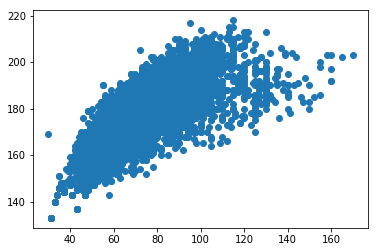

In [9]:
# Demostrememos que existe una correlacion (la cual es evidente) entre altura y peso. 

atletas["Weight"].corr(atletas["Height"])
_= plt.scatter(x=atletas["Weight"],y=atletas["Height"])

0.05842322750054002

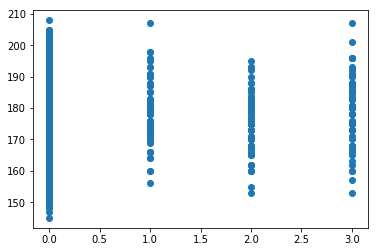

In [10]:
"""Midamos si existe alguna relacion evidente entre la altura de los atletas de atletimos y las medallas ganadas"""

# Creamos una nueva columna que asigne un valor numerico a las medallas oro:3, plata:2, bronce:1. 
atletas["Medal Numb"] = atletas["Medal"].apply(lambda x: 0 if x =="Ninguna" else 1 if x=="Bronze" else 2 if x=="Silver" else 3  if x=="Gold" else 0)

# Filtramos la tabla para atletismo. 
athletics = atletas[atletas["Sport"]=="Athletics"]

# Imprimimos la correlacion y un grafico. No parece haber ninguna relacion.
# Es evidente que el correlacion de pearson va a dar bajo ya que no puede existir una relacion lineal debido a como
# esta definida la columna del valor numerico de las medallas. 
display(athletics["Height"].corr(athletics["Medal Numb"]))
_= plt.scatter(x=athletics["Medal Numb"],y=athletics["Height"])

In [11]:
# Investiguemos en que deporte la diferencia de la altura media entre los que ganaron medalla y los que no es mayor.

# Creo una nueva columna para distinguir entre aquellos que tienen medallas y los que no. 
data = atletas[["Height","Sport","Medal"]]
data["Medal2"]= data["Medal"].apply(lambda x: 0 if x =="Ninguna" else 1)

/usr/local/Cellar/ipython/7.0.1/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [13]:
# Creo una tabla pivot para agrupar la informacion como me interesa.
data2 = data.pivot_table(index=["Sport","Medal2"]).reset_index()
data3 = data2.pivot_table(index="Sport",columns="Medal2")

# Creo un dataframe con la media de las diferencias para luego ordenarlo y calcular la max. 
diferencias = pd.DataFrame(data3.iloc[:].iloc[:,1] - data3.iloc[:].iloc[:,0]).reset_index()

# Observamos que sorpresivamente donde mayor diferencia hay es en el Golf (5.3 cm)
display(diferencias.sort_values(by=0,ascending=False).head())

,Sport,0
12,Golf,5.263158
17,Modern Pentathlon,4.772727
30,Volleyball,3.336032
15,Hockey,3.223159
23,Swimming,3.132877
